<a href="https://colab.research.google.com/github/kiran-bhandari16/LSTM-Stock-Price-Prediciton/blob/main/Stock_Price_Prediction_using_LSTM_with_Look_Back.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final-stock-dataset-with-sentiment-polarity-subjectivity.csv to final-stock-dataset-with-sentiment-polarity-subjectivity.csv


In [163]:
df = pd.read_csv("final-stock-dataset-with-sentiment-polarity-subjectivity.csv", index_col=0)
df.shape

(948, 10)

In [164]:
df

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
Date,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0
...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0
2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0
2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0


In [165]:
dataset=df.filter(["Ltp"])

In [166]:
dataset

,Ltp
Date,
2022-06-29,315.0
2022-06-28,313.0
2022-06-27,312.0
2022-06-26,320.0
2022-06-24,307.0
...,...
2016-07-17,955.0
2016-07-14,869.0
2016-07-13,790.0


In [167]:
dataset = dataset.values

In [168]:
dataset = dataset.astype('float32')

## Data Pre-processing:

We must pre-process this data before applying stock price using LSTM. Transform the values in our data with help of the fit_transform function. Min-max scaler is used for scaling the data so that we can bring all the price values to a common scale. We then use 80 % data for training and the rest 20% for testing and assign them to separate variables.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [169]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [170]:
dataset

array([[0.0443093 ],
       [0.04257168],
       [0.04170285],
       [0.04865335],
       [0.03735881],
       [0.03996526],
       [0.03970461],
       [0.05152039],
       [0.03649001],
       [0.03996526],
       [0.0451781 ],
       [0.04691572],
       [0.04778452],
       [0.05560382],
       [0.06081669],
       [0.06255428],
       [0.08861859],
       [0.09782799],
       [0.10251956],
       [0.10512598],
       [0.10599478],
       [0.10251956],
       [0.09817551],
       [0.10338835],
       [0.10512598],
       [0.10608168],
       [0.1077324 ],
       [0.1146829 ],
       [0.11520417],
       [0.10860123],
       [0.11207645],
       [0.11642049],
       [0.11728932],
       [0.1155517 ],
       [0.11989574],
       [0.11120765],
       [0.11381407],
       [0.11815812],
       [0.10799305],
       [0.11120765],
       [0.11381407],
       [0.11207645],
       [0.11381407],
       [0.11728932],
       [0.1155517 ],
       [0.11381407],
       [0.11381407],
       [0.116

In [171]:
dataset.shape

(948, 1)

In [172]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size

In [173]:
train_size, test_size

(758, 190)

In [174]:
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [175]:
train.shape, test.shape

((758, 1), (190, 1))

Now we can define a function to create a new dataset, as described above.

The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period and eventually decided to use look back days of 20 days.

This default will create a dataset where X is the number of stock price at a given time (t) and Y is the number of stock price at the next time (t + 20).

It can be configured, and we will by constructing a differently shaped dataset in the next section.

In [176]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [177]:
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [178]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((752, 5), (752,), (184, 5), (184,))

In [179]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [180]:
trainX.shape, testX.shape

((752, 1, 5), (184, 1, 5))

In [181]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, activation='tanh', return_sequences=True, input_dim=look_back))
model.add(Dropout(0.2))
model.add(LSTM(units=2, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=2))
model.add(Dropout(0.2))
model.add(Dense(1))

In [182]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, None, 4)           160       
                                                                 
 dropout_12 (Dropout)        (None, None, 4)           0         
                                                                 
 lstm_14 (LSTM)              (None, None, 2)           56        
                                                                 
 dropout_13 (Dropout)        (None, None, 2)           0         
                                                                 
 lstm_15 (LSTM)              (None, 2)                 40        
                                                                 
 dropout_14 (Dropout)        (None, 2)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [183]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [184]:
model.fit(trainX, trainY, epochs=100, batch_size=30, verbose=2)

Epoch 1/100
26/26 - 5s - loss: 0.0088 - 5s/epoch - 208ms/step
Epoch 2/100
26/26 - 0s - loss: 0.0053 - 89ms/epoch - 3ms/step
Epoch 3/100
26/26 - 0s - loss: 0.0040 - 94ms/epoch - 4ms/step
Epoch 4/100
26/26 - 0s - loss: 0.0038 - 95ms/epoch - 4ms/step
Epoch 5/100
26/26 - 0s - loss: 0.0038 - 106ms/epoch - 4ms/step
Epoch 6/100
26/26 - 0s - loss: 0.0037 - 107ms/epoch - 4ms/step
Epoch 7/100
26/26 - 0s - loss: 0.0037 - 108ms/epoch - 4ms/step
Epoch 8/100
26/26 - 0s - loss: 0.0037 - 108ms/epoch - 4ms/step
Epoch 9/100
26/26 - 0s - loss: 0.0036 - 106ms/epoch - 4ms/step
Epoch 10/100
26/26 - 0s - loss: 0.0033 - 103ms/epoch - 4ms/step
Epoch 11/100
26/26 - 0s - loss: 0.0032 - 105ms/epoch - 4ms/step
Epoch 12/100
26/26 - 0s - loss: 0.0030 - 103ms/epoch - 4ms/step
Epoch 13/100
26/26 - 0s - loss: 0.0026 - 100ms/epoch - 4ms/step
Epoch 14/100
26/26 - 0s - loss: 0.0023 - 100ms/epoch - 4ms/step
Epoch 15/100
26/26 - 0s - loss: 0.0020 - 120ms/epoch - 5ms/step
Epoch 16/100
26/26 - 0s - loss: 0.0021 - 105ms/epoch 

In [185]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [186]:
trainY

array([0.03996526, 0.03970461, 0.05152039, 0.03649001, 0.03996526,
       0.0451781 , 0.04691572, 0.04778452, 0.05560382, 0.06081669,
       0.06255428, 0.08861859, 0.09782799, 0.10251956, 0.10512598,
       0.10599478, 0.10251956, 0.09817551, 0.10338835, 0.10512598,
       0.10608168, 0.1077324 , 0.1146829 , 0.11520417, 0.10860123,
       0.11207645, 0.11642049, 0.11728932, 0.1155517 , 0.11989574,
       0.11120765, 0.11381407, 0.11815812, 0.10799305, 0.11120765,
       0.11381407, 0.11207645, 0.11381407, 0.11728932, 0.1155517 ,
       0.11381407, 0.11381407, 0.11642049, 0.12006952, 0.12293656,
       0.12597741, 0.12510861, 0.12397917, 0.12163337, 0.12510861,
       0.12858383, 0.12684621, 0.11815812, 0.12510861, 0.12814943,
       0.13162468, 0.13900955, 0.14187662, 0.13892268, 0.1346655 ,
       0.14161597, 0.1406603 , 0.14422242, 0.13900955, 0.13814075,
       0.14682885, 0.16385753, 0.1702867 , 0.15551694, 0.15794961,
       0.16507386, 0.16854908, 0.18071242, 0.17680277, 0.17897

In [187]:
trainY.shape, testY.shape

((752,), (184,))

In [188]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [189]:
trainPredict

array([[329.2161 ],
       [327.57996],
       [327.06686],
       [329.40445],
       [329.14996],
       [327.54648],
       [328.29425],
       [329.91318],
       [331.1606 ],
       [333.89462],
       [337.72244],
       [340.94003],
       [349.1158 ],
       [360.22336],
       [368.99457],
       [375.2045 ],
       [379.23407],
       [379.98032],
       [378.37512],
       [377.95364],
       [379.01285],
       [380.14713],
       [381.47662],
       [384.4396 ],
       [387.27945],
       [387.16623],
       [386.83502],
       [388.3365 ],
       [389.9574 ],
       [390.54846],
       [391.92062],
       [391.02472],
       [389.57776],
       [390.34094],
       [388.8823 ],
       [387.03937],
       [387.50443],
       [387.68414],
       [387.82993],
       [389.42523],
       [390.36145],
       [390.0495 ],
       [389.6183 ],
       [390.01035],
       [391.54663],
       [393.8514 ],
       [396.49704],
       [398.27646],
       [398.74765],
       [398.0758 ],


In [190]:
trainPredict.shape

(752, 1)

In [191]:
trainY

array([[310.00001474, 309.70000532, 323.29997498, 306.00000348,
        310.00001474, 315.99999732, 318.00000295, 318.99998861,
        327.99999678, 334.00001367, 335.99998499, 366.0000008 ,
        376.60001348, 382.00001152, 385.00000281, 385.99998848,
        382.00001152, 377.00001461, 382.99999719, 385.00000281,
        386.10001448, 387.9999941 , 396.00001662, 396.60000115,
        389.00001407, 392.99999102, 397.99998794, 399.00000791,
        397.00000228, 401.9999992 , 392.00000536, 394.99999665,
        399.99999357, 388.30000352, 392.00000536, 394.99999665,
        392.99999102, 394.99999665, 399.00000791, 397.00000228,
        394.99999665, 394.99999665, 397.99998794, 402.20001691,
        405.49998332, 409.00000174, 408.00001608, 406.700021  ,
        404.00000482, 408.00001608, 411.99999303, 409.9999874 ,
        399.99999357, 408.00001608, 411.5000002 , 415.50001146,
        423.9999925 , 427.29999321, 423.90000079, 418.99999558,
        426.99998379, 425.90000642, 430.

In [192]:
trainY.shape

(1, 752)

In [193]:
testPredict

array([[405.3481 ],
       [406.3551 ],
       [408.6393 ],
       [411.50543],
       [414.28967],
       [417.07004],
       [420.65765],
       [423.99704],
       [426.31427],
       [426.4198 ],
       [427.6818 ],
       [429.26154],
       [430.6006 ],
       [430.9001 ],
       [431.13843],
       [433.04086],
       [438.31274],
       [442.02075],
       [443.87097],
       [446.96826],
       [449.9226 ],
       [451.7178 ],
       [454.6344 ],
       [457.815  ],
       [459.3573 ],
       [461.80066],
       [463.10086],
       [462.73944],
       [461.71704],
       [460.8433 ],
       [461.00418],
       [461.09094],
       [458.46606],
       [457.0676 ],
       [457.73734],
       [458.2995 ],
       [459.92508],
       [460.8013 ],
       [462.1693 ],
       [465.13254],
       [468.5387 ],
       [471.83435],
       [473.65176],
       [474.11517],
       [474.90195],
       [476.8389 ],
       [478.55304],
       [504.13745],
       [528.2495 ],
       [541.13904],


In [194]:
testPredict.shape

(184, 1)

In [195]:
testY

array([[ 418.00000992,  425.99999812,  426.99998379,  430.99999504,
         435.0000063 ,  440.99998888,  444.00001447,  444.00001447,
         438.99998325,  447.99999142,  447.00000576,  449.99999705,
         445.9999858 ,  447.99999142,  456.00001394,  469.99998472,
         464.99998781,  466.00000777,  475.00001595,  476.00000161,
         478.00000724,  485.00000978,  488.00000107,  485.99999544,
         495.00000362,  488.99998673,  488.00000107,  485.00000978,
         485.00000978,  490.0000067 ,  485.99999544,  475.00001595,
         481.99998419,  485.00000978,  485.00000978,  490.99999236,
         485.00000978,  493.99998365,  500.00000054,  504.99999745,
         509.99999437,  504.99999745,  505.99998312,  509.00000871,
         516.00001126,  516.00001126,  670.00001581,  685.99999223,
         689.00001782,  673.0000414 ,  668.00004449,  674.00002707,
         680.00000965,  675.00001273,  678.00003832,  685.00000657,
         700.99998298,  714.99998807,  722.00002

In [196]:
testY.shape

(1, 184)

In [197]:
# calculate regression metrics
print("----------MAE-------------")
trainScore_mae = (metrics.mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f' % (trainScore_mae))
testScore_mae = math.sqrt(metrics.mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f' % (testScore_mae))

print(" ")
print("----------MSE-------------")
trainScore_mse = (metrics.mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f' % (trainScore_mse))
testScore_mse = (metrics.mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f' % (testScore_mse))

print(" ")
print("----------RMSE-------------")
trainScore_rmse = math.sqrt(metrics.mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f' % (trainScore_rmse))
testScore_rmse = math.sqrt(metrics.mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f' % (testScore_rmse))

print(" ")
print("----------R2-------------")
trainScore_r2 = (metrics.r2_score(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f' % (trainScore_r2))
testScore_r2 = (metrics.r2_score(testY[0], testPredict[:,0]))
print('Test Score: %.2f' % (testScore_r2))

print(" ")
print("------------Accuracy----------")
errors = abs(testPredict - testY)
mape = 100 * (errors / testY)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

----------MAE-------------
Train Score: 17.86
Test Score: 17.23
 
----------MSE-------------
Train Score: 483.70
Test Score: 153009.45
 
----------RMSE-------------
Train Score: 21.99
Test Score: 391.16
 
----------R2-------------
Train Score: 0.90
Test Score: -0.65
 
------------Accuracy----------
Accuracy: 66.04 %.


In [198]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [199]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [200]:
scaler.inverse_transform(dataset)

array([[ 315.     ],
       [ 313.     ],
       [ 312.     ],
       [ 320.     ],
       [ 307.     ],
       [ 310.     ],
       [ 309.7    ],
       [ 323.3    ],
       [ 306.     ],
       [ 310.     ],
       [ 316.     ],
       [ 318.     ],
       [ 319.     ],
       [ 328.     ],
       [ 334.     ],
       [ 336.     ],
       [ 366.     ],
       [ 376.6    ],
       [ 382.     ],
       [ 385.     ],
       [ 386.     ],
       [ 382.     ],
       [ 377.     ],
       [ 383.     ],
       [ 385.     ],
       [ 386.1    ],
       [ 388.     ],
       [ 396.00003],
       [ 396.6    ],
       [ 389.     ],
       [ 393.     ],
       [ 398.     ],
       [ 399.     ],
       [ 397.     ],
       [ 402.     ],
       [ 392.     ],
       [ 395.     ],
       [ 400.     ],
       [ 388.30002],
       [ 392.     ],
       [ 395.     ],
       [ 393.     ],
       [ 395.     ],
       [ 399.     ],
       [ 397.     ],
       [ 395.     ],
       [ 395.     ],
       [ 398.

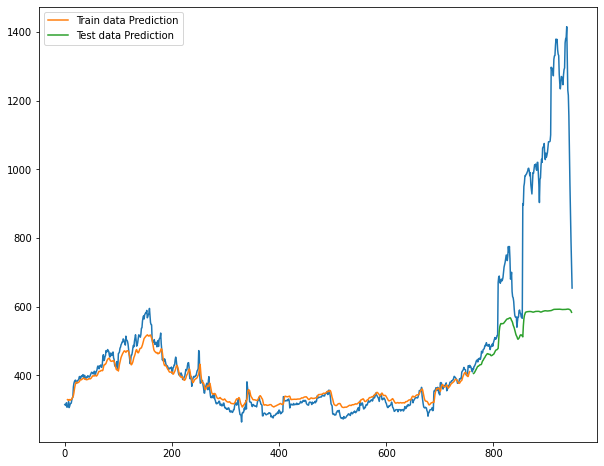

In [201]:
# plot baseline and predictions
plt.figure(figsize=(10,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, label="Train data Prediction")
plt.plot(testPredictPlot, label="Test data Prediction")
plt.legend()
plt.show()